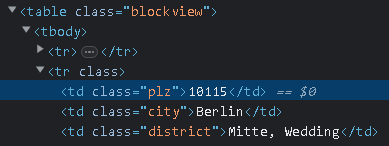

In [8]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.dastelefonbuch.de/Postleitzahlen/Berlin'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# find the container that contains all the data
container = soup.find('div', {'class': 'result-list plz-list'})

# create an empty list to store the data
data = []

# iterate through each row of the container and extract the data
for row in container.find_all('div', {'class': 'result-entry clearfix'}):
    postal_code = row.find('div', {'class': 'plz'}).text.strip()
    district = row.find('div', {'class': 'district'}).text.strip()
    city = row.find('div', {'class': 'city'}).text.strip()
    
    # append the data to the list
    data.append([postal_code, district, city])

# print the data
for row in data:
    print(row)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [7]:
import bs4 as bs
import urllib.request
import time
from datetime import datetime
import pandas as pd
import json
for seite in range(1,3000):
    
    print("Loop " + str(seite) + " startet.")
    df = pd.DataFrame()
    l=[]
    try:
        
        soup = bs.BeautifulSoup(urllib.request.urlopen("https://www.immobilienscout24.de/Suche/S-2/P-"+str(seite)+"/Berlin").read(),'lxml')
        print("Aktuelle Seite: "+"https://www.immobilienscout24.de/Suche/S-2/P-"+str(seite)+"/Haus-Kauf")
        for paragraph in soup.find_all("a"):
            if r"/expose/" in str(paragraph.get("href")):
                l.append(paragraph.get("href").split("#")[0])
            l = list(set(l))
        for item in l:
            try:
                soup = bs.BeautifulSoup(urllib.request.urlopen('https://www.immobilienscout24.de'+item).read(),'lxml')
                data = pd.DataFrame(json.loads(str(soup.find_all("script")).split("keyValues = ")[1].split("}")[0]+str("}")),index=[str(datetime.now())])
                data["URL"] = str(item)
                beschreibung = []
                for i in soup.find_all("pre"):
                    beschreibung.append(i.text)
                data["beschreibung"] = str(beschreibung)
                df = df.append(data)
            except Exception as e: 
                print(str(datetime.now())+": " + str(e))
                l = list(filter(lambda x: x != item, l))
                print("ID " + str(item) + " entfernt.")
        print("Exportiert CSV")
        df.to_csv(".../rohdaten/"+str(datetime.now())[:19].replace(":","").replace(".","")+".csv",sep=";",decimal=",",encoding = "utf-8",index_label="timestamp")     
        print("Loop " + str(seite) + " endet.\n")
        
    except Exception as e: 
        print(str(datetime.now())+": " + str(e))
print("FERTIG!")

Loop 1 startet.
2023-04-17 10:50:57.701182: HTTP Error 405: 
Loop 2 startet.
2023-04-17 10:50:58.091613: HTTP Error 405: 
Loop 3 startet.
2023-04-17 10:50:58.489066: HTTP Error 405: 
Loop 4 startet.
2023-04-17 10:50:58.903135: HTTP Error 405: 
Loop 5 startet.
2023-04-17 10:50:59.323937: HTTP Error 405: 
Loop 6 startet.
2023-04-17 10:50:59.748045: HTTP Error 405: 
Loop 7 startet.
2023-04-17 10:51:00.144018: HTTP Error 405: 
Loop 8 startet.
2023-04-17 10:51:00.519501: HTTP Error 405: 
Loop 9 startet.
2023-04-17 10:51:00.907284: HTTP Error 405: 
Loop 10 startet.
2023-04-17 10:51:01.301294: HTTP Error 405: 
Loop 11 startet.
2023-04-17 10:51:01.693125: HTTP Error 405: 
Loop 12 startet.
2023-04-17 10:51:02.089521: HTTP Error 405: 
Loop 13 startet.
2023-04-17 10:51:02.520259: HTTP Error 405: 
Loop 14 startet.
2023-04-17 10:51:02.915928: HTTP Error 405: 
Loop 15 startet.
2023-04-17 10:51:03.300891: HTTP Error 405: 
Loop 16 startet.
2023-04-17 10:51:03.705595: HTTP Error 405: 
Loop 17 startet.


KeyboardInterrupt: 

In [3]:
url = "https://www.immobilienscout24.de/Suche/de/wohnung-mieten?sorting=2#"
response = requests.get(url)
response.status_code

403

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
#result-l-141514732 > div > div.grid-item.result-list-entry__data-container > div > a > h5

In [6]:
soup.select("#result-l-141514732 > div > div.grid-item.result-list-entry__data-container > div > a > h5")

[]

In [2]:
url = "https://www.immobilienscout24.de/Suche/de/wohnung-mieten?sorting=2#"

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:82.0) Gecko/20100101 Firefox/82.0',
    'Accept-Language': 'en-US,en;q=0.5'
}

soup = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')

for h5 in soup.select('h5'):
    print(h5.get_text(strip=True, separator=' '))